## BINF TP6 : bases de données métaboliques et rdkit

Les bases de données métaboliques stockent des informations sur les composés et réaction chimiques présentes chez différents organismes ainsi que les enzymes associées. rdkit est une bibliothèque de manipulation de composés et réactions chimiques.

Installons rdkit :

In [5]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 47.3 MB/s eta 0:00:00


## Exercice 1 : Base de données Kegg et visualisation du cycle TCA

[https://www.genome.jp/kegg/](https://www.genome.jp/kegg/)

1. Utilisez le module «pathway » de la base de donnes Kegg pour visualiser le cycle de l’acide citrique. Appelé en anglais : TCA cycle, citric acid cycle ou encore Krebs cycle.
2. Combien de reactions contient-il ? On s'intéresse uniquement aux réactions du cycle contenant l'acide citrique.

8

3. Quels sont les identifiants EC (E.C numbers) associes à chacune de ces réactions.


    4.2.1.3
    1.1.1.42
    1.2.4.2
    6.2.1.5
    1.3.5.1
    4.2.1.2
    1.1.1.37
    2.3.3.1



4. Pourquoi certains identifiants EC sont-ils en double ?

Les réactions sont les mêmes, mais celles-ci sont catalysées par des enzymes différents.

5. Qu’observez-vous de plus à propos de ces EC numbers ?

On voit une diversité de classes enzymatiques (EC 1, 2, 4, 6), montrant la variété des mécanismes chimiques dans le cycle.

Malheureusement la base de données KEGG ne peut pas être téléchargée gratuitement, nous allons donc changer de base de données.

## Exercice 2 : Base de données Rhea et visualisation du cycle TCA

[https://www.rhea-db.org/](https://www.rhea-db.org/)

A L’inverse, la base de données Rhea est téléchargeable, mais elle ne fournit pas de visualisation des voies métaboliques. C’est pour ça que l’on a fait la partie précédente avec KEGG.


1. Trouvez les IDs Rhea associés aux EC numbers extraits dans l'exercice précédent. Faites attention à choisir des réactions unidirectionnelles. Si vous avez l’id d’une réaction bidirectionnelle, id+1 et id+2 devraient correspondre aux réactions décomposées dans chaque sens. Faites attention au sens de réaction.

10337

19630

12189

15215

22122

77904

12462

21433

16846

2. Téléchargez Rhea, choisissez le format « rhea-reaction-smiles.tsv ». Quel est ce format ?

La séparation se fait avec des tab

3. Chargez ce fichier via RdKit via "rdChemReactions.ReactionFromSmarts" du module rdkit.Chem

In [7]:
from rdkit import Chem
from rdkit.Chem import rdChemReactions
import csv

reaction_dict = {}

with open("rhea-reaction-smiles.tsv", "r") as f:
    for line in f:
        line = line.strip()
        if line:
            parts = line.split("\t")
            if len(parts) >= 2:
                rxn_id, smarts = parts[0], parts[1]
                try:
                    rxn = rdChemReactions.ReactionFromSmarts(smarts)
                    if rxn:
                        reaction_dict[rxn_id] = rxn
                except Exception as e:
                    print(f"Erreur avec {rxn_id} : {e}")

4. Cherchez dans ces réactions celles associées au cycle TCA en vous basant sur l’ID Rhea.

In [12]:
recherche_id = [10337, 19630, 12189, 15215, 22122, 77904, 12462, 21433, 16846]

matches = [(rid, rxn) for rid, rxn in reaction_dict.items() if int(rid.split(":")[-1]) in recherche_id]

for rid, rxn in matches:
    print(f"Match trouvé : ID = {rid} -> {rxn}")

Match trouvé : ID = 10337 -> <rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x7fd3728ddd90>
Match trouvé : ID = 12189 -> <rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x7fd372909690>
Match trouvé : ID = 12462 -> <rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x7fd372910e40>
Match trouvé : ID = 15215 -> <rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x7fd3729476f0>
Match trouvé : ID = 16846 -> <rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x7fd3729683c0>
Match trouvé : ID = 19630 -> <rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x7fd37299fbc0>
Match trouvé : ID = 21433 -> <rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x7fd3729c6c00>
Match trouvé : ID = 22122 -> <rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x7fd37250b7d0>
Match trouvé : ID = 77904 -> <rdkit.Chem.rdChemReactions.ChemicalReaction object at 0x7fd371586110>


5. Affichez les réactions du cycle TCA, vous pouvez utiliser la fonction display de « IPython.display » sur une réaction, vous devez aussi importer

« from rdkit.Chem.Draw import IPythonConsole »

ID = 10337


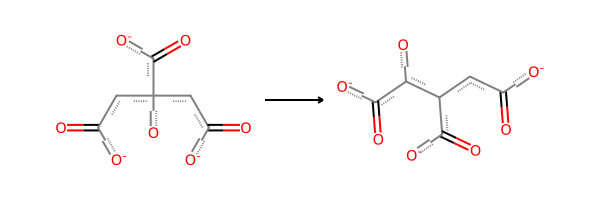

ID = 12189


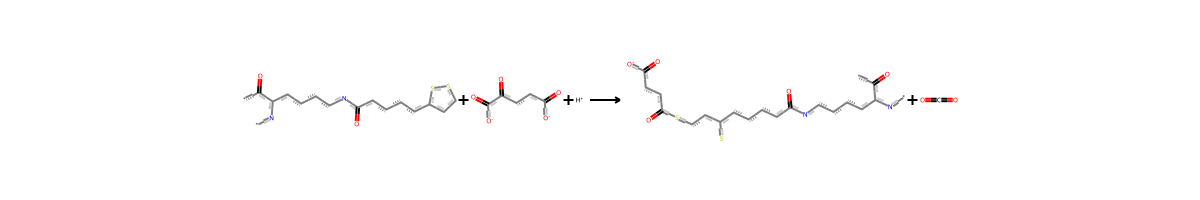

ID = 12462


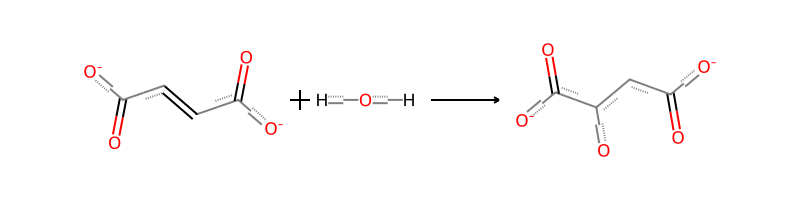

ID = 15215


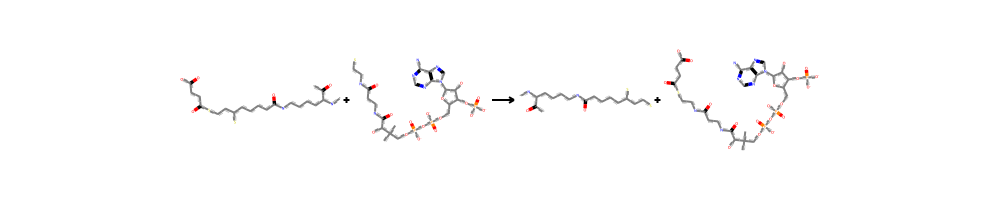

ID = 16846


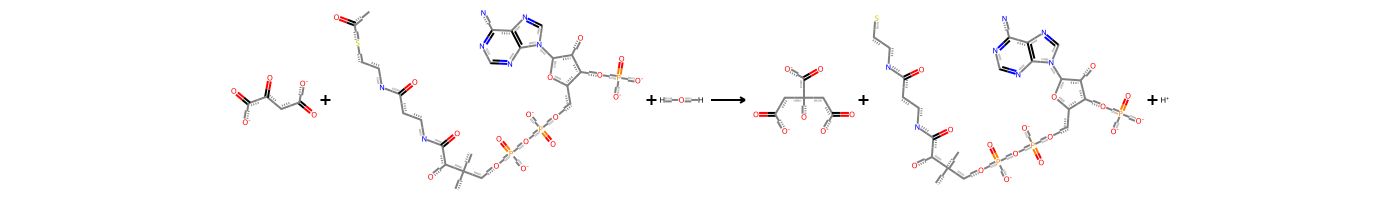

ID = 19630


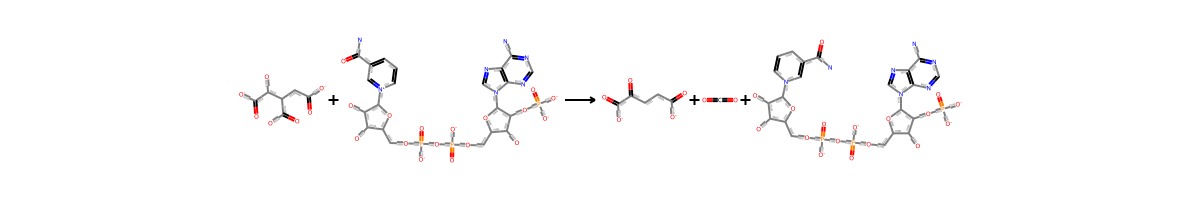

ID = 21433


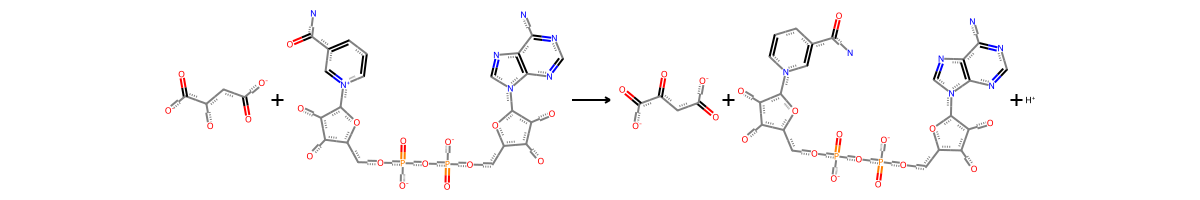

ID = 22122


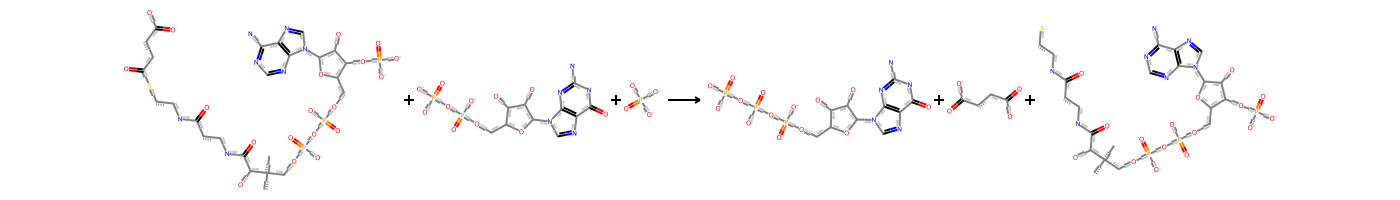

ID = 77904


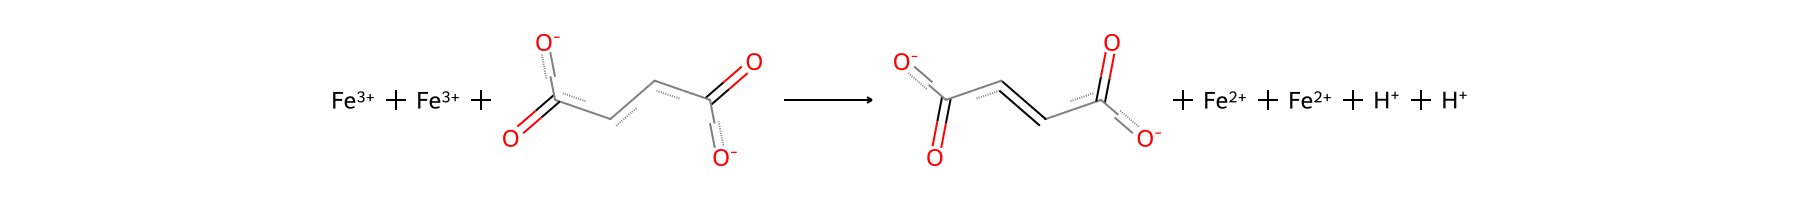

In [13]:
from IPython.display import display
from rdkit.Chem import Draw

for rid, rxn in matches:
    print(f"ID = {rid}")
    display(Draw.ReactionToImage(rxn))



## Exercice 3 : RdKit

1.	Pour se familiariser avec Rdkit et le format MOL nous allons faire un parser de MOL.
Ecrire la fonction load_mol(fname: str) -> Chem.Mol qui prend un fichier mol en entrée et retourne la molécule associée au format Mol de RdKit.
Utilisez Chem.Mol, Chem.EditableMol, m.AddAtom, m.AddBond

In [47]:
from rdkit import Chem
from rdkit.Chem import rdchem

def load_mol(fname: str):
    with open(fname, "r") as f:
        lines = f.readlines()

    counts_line = lines[3]
    num_atoms = int(counts_line[0:3])
    num_bonds = int(counts_line[3:6])

    emol = Chem.EditableMol(Chem.Mol())

    atom_lines = lines[4:4 + num_atoms]
    for line in atom_lines:
        symbol = line[31:34].strip()
        atom = Chem.Atom(symbol)
        emol.AddAtom(atom)

    bond_lines = lines[4 + num_atoms:4 + num_atoms + num_bonds]
    for line in bond_lines:
        begin_idx = int(line[0:3]) - 1
        end_idx = int(line[3:6]) - 1
        bond_type = int(line[6:9])

        if bond_type == 1:
            btype = Chem.rdchem.BondType.SINGLE
        elif bond_type == 2:
            btype = Chem.rdchem.BondType.DOUBLE
        elif bond_type == 3:
            btype = Chem.rdchem.BondType.TRIPLE
        elif bond_type == 4:
            btype = Chem.rdchem.BondType.AROMATIC
        else:
            btype = Chem.rdchem.BondType.UNSPECIFIED

        emol.AddBond(begin_idx, end_idx, btype)

    mol = emol.GetMol()
    Chem.SanitizeMol(mol)
    return mol


2.	Ecrire la fonction raw_formula(m: Chem.Mol) -> str qui retourne la formule brute de la molécule m.
Utilisez GetAtoms sur une molécule pour récupérer les listes des atomes et GetSymbol sur un atome pour récupérer son symbole.

In [46]:
from rdkit import Chem

def raw_formula(m: Chem.Mol):
    atoms = m.GetAtoms()
    counts = {}
    for atom in atoms:
        symbol = atom.GetSymbol()
        counts[symbol] = counts.get(symbol, 0) + 1
    formula = ""
    for symbol in sorted(counts.keys()):
        formula += symbol
        if counts[symbol] > 1:
            formula += str(counts[symbol])
    return formula

3.	Récupérez les smiles et inchi de la molécule "citrulline" à partir des bases de données Rhea et pubchem. Puis :

* Comparez les Smiles ;
* Chargez les molécules dans rdkit via « Chem.MolFromSmiles» et comparez-les ;
* Comparez les formules brutes généré par votre fonction précédente ;
* Comparez les smiles générés par « Chem.MolToSmiles » ;
* Testez la méthode « m.HasSubstructMatch(m2) ».

In [29]:
import requests
from rdkit import Chem

def load_rhea_smiles(filename):
    reactions = []
    with open(filename, "r") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            rid, smi = line.split('\t', 1)
            reactions.append((rid, smi))
    return reactions

def get_pubchem_smiles_inchi(name):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{name}/property/CanonicalSMILES,InChI/JSON"
    response = requests.get(url)
    data = response.json()
    props = data['PropertyTable']['Properties'][0]
    return props['CanonicalSMILES'], props['InChI']

rhea_data = load_rhea_smiles("/content/rhea-reaction-smiles.tsv")

smiles_pubchem, inchi_pubchem = get_pubchem_smiles_inchi("citrulline")
mol_pubchem = Chem.MolFromSmiles(smiles_pubchem)

smiles_rhea="NC(CCCNC(N)=O)C(O)=O"
mol_rhea = Chem.MolFromSmiles(smiles_rhea)


print("PubChem SMILES:", smiles_pubchem)
print("PubChem InChI:", inchi_pubchem)

print("SMILES identiques ?", smiles_pubchem == smiles_rhea)
print("Mol identiques ?", mol_pubchem.HasSubstructMatch(mol_rhea) and mol_rhea.HasSubstructMatch(mol_pubchem))

print("Formule brute PubChem :", raw_formula(mol_pubchem))
print("Formule brute Rhea :", raw_formula(mol_rhea))

print("SMILES RDKit PubChem :", Chem.MolToSmiles(mol_pubchem))
print("SMILES RDKit Rhea :", Chem.MolToSmiles(mol_rhea))

print("PubChem contient Rhea ?", mol_pubchem.HasSubstructMatch(mol_rhea))
print("Rhea contient PubChem ?", mol_rhea.HasSubstructMatch(mol_pubchem))



PubChem SMILES: C(CC(C(=O)O)N)CNC(=O)N
PubChem InChI: InChI=1S/C6H13N3O3/c7-4(5(10)11)2-1-3-9-6(8)12/h4H,1-3,7H2,(H,10,11)(H3,8,9,12)/t4-/m0/s1
SMILES identiques ? False
Mol identiques ? True
Formule brute PubChem : C6N3O3
Formule brute Rhea : C6N3O3
SMILES RDKit PubChem : NC(=O)NCCCC(N)C(=O)O
SMILES RDKit Rhea : NC(=O)NCCCC(N)C(=O)O
PubChem contient Rhea ? True
Rhea contient PubChem ? True


4.	A quelle molécule correspond ce smiles :

C[NH2+] [C@H] 1[C@H] (O) [C@@H] (O) [C@H] (CO) O[C@H] 1O[C@H] 1[C@@H] (O[C@@H] (C) [C@] 1(O) CO) O[C@H] 1[C@H] (O) [C@@H] (OP([O- ] ) ([O- ] ) =O) [C@H] (NC(N) =[NH2+] ) [C@@H] (O) [C@@H] 1NC(N) =[NH2+]

C[NH2+][C@@H]1[C@H](O[C@H]2[C@H](O[C@H]3[C@H](O)[C@@H](OP(=O)([O-])[O-])[C@H](NC(N)=[NH2+])[C@@H](O)[C@@H]3NC(N)=[NH2+])O[C@@H](C)[C@]2(O)CO)O[C@@H](CO)[C@H](O)[C@H]1O


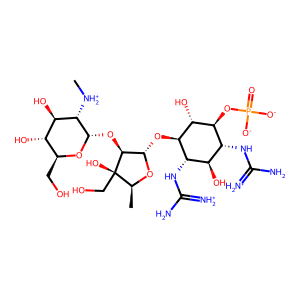

In [45]:
from rdkit import Chem

smiles = "C[NH2+][C@H]1[C@H](O)[C@@H](O)[C@H](CO)O[C@H]1O[C@H]1[C@@H](O[C@@H](C)[C@]1(O)CO)O[C@H]1[C@H](O)[C@@H](OP([O-])([O-])=O)[C@H](NC(N)=[NH2+])[C@@H](O)[C@@H]1NC(N)=[NH2+]"
mol = Chem.MolFromSmiles(smiles)

smiles_canon = Chem.MolToSmiles(mol, canonical=True)
print(smiles_canon)
Draw.MolToImage(mol)


Dihydrostreptomycin 6-phosphate(1+) d'après pubchem